# Scikit-learn

특징 

1. 파이썬으로 구현된 라이브러리 중에서 머신 러닝 교육 및 실무용으로 가장 많이 사용 되고 있는 open source library
2. API 가 일관되고 간결함 

### Bunch 클래스
- 속성
  - **data**(필수) : 독립변수 ndarray 배열
  - **target**(필수) : 종속변수 ndarray 배열
  - feature_names : 독립 변수 이름 리스트
  - target_names : 종속 변수 이름 리스트 
  - DESCR : 자료에 대한 설명 

In [5]:
# 데이터세트 로딩 
from sklearn.datasets import load_iris
data = load_iris()

In [2]:
# 데이터에 대한 정보를 출력 
load_iris??

In [6]:
# data의 유형 
type(data)

sklearn.utils.Bunch

In [7]:
# dir (data 안에 어떤 것들이 포함되어 있는지?)
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [8]:
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
# 데이터 정보(설명)를 출력 하는 코드 (DESC)
from IPython.display import HTML

#HTML(data.DESCR.replace('\n','\<br/>'))

### 데이터 전처리 🧹
✅ 현실에서 가져오는 raw 데이터의품질을 보완하는 작업 (중요..중요)
<br>
<br>
#### 데이터 전처리의 주요 작업 
- 데이터 정제(Cleaning, Cleansing)
  - 결측값(missing value)를 채우거나, 잡음값(noisy data)를 평활화(smoothing), 이상치(outlier) 발견하여 제거, 불일치 해결 

- 데이터 통합(Integration) 
  - 다수의 소스에서 얻은 데이터를 합쳐서 표현 

- 축소(Reduction)
  - 크기는 작지만 분석 결과는 동일한 데이터로 표현 

- 변환(Transformation)
  - 기계학습 알고리즘의 효율성을 극대화하기 위한 변형
___



### 표준화 (Standardization, mean removal and variance scaling)

목표 : 자료에 선형 변환을 적용하여 전체 자료의 **평균 = 0, 분산 = 1** 이 되도록 설정 

목적 : overflow 혹은 underflow 방지하기 위함 

##### 제공되는 함수와 클래스 🧮
- scale(x) 
- robust_scale(x)
- minmax_scale(x)
- maxabs_scale(x)

In [12]:
# 함수, 클래스 가져오기 
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [34]:
# 전처리 하려는 데이터 값 
import numpy as np
x = (np.arange(10, dtype=np.float) - 3).reshape(-1,1)
x

array([[-3.],
       [-2.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.]])

___


표준화에서는 데이터의 
- scale(x) 
  - 표준 정규분포 스케일 

- robust_scale(X)
  - median 사용. Outlier의 영향 최소화 
  - 범위 : -1 ~ 1

- minmax_scale(X)
  - 최대, 최소값 아용 
  - 범위 : 0 ~ 1, 근사치 사용 

- maxabs_scale(X)
  - 최대 절대값 (1) 사용 
  - 절대값이 가장 큰 수를 1로 두며, 음수값이 큰 경우 그 값은 -1 

In [15]:
# 전처리 결과 출력 
import pandas as pd 
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]), 
columns = ["x","scale(x)", 'robust_scale(x)', 'minmax_scale(x)', 'maxabs_scale(x)'])
df

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
0,-3.0,-1.566699,-1.000000,0.000000,-0.500000
1,-2.0,-1.218544,-0.777778,0.111111,-0.333333
2,-1.0,-0.870388,-0.555556,0.222222,-0.166667
3,0.0,-0.522233,-0.333333,0.333333,0.000000
4,1.0,-0.174078,-0.111111,0.444444,0.166667
5,2.0,0.174078,0.111111,0.555556,0.333333
6,3.0,0.522233,0.333333,0.666667,0.500000
7,4.0,0.870388,0.555556,0.777778,0.666667
8,5.0,1.218544,0.777778,0.888889,0.833333
9,6.0,1.566699,1.000000,1.000000,1.000000


* 표준화에서는 데이터의 모양에 변화가 없다 

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()
data1 = iris.data
data4 = minmax_scale(data1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


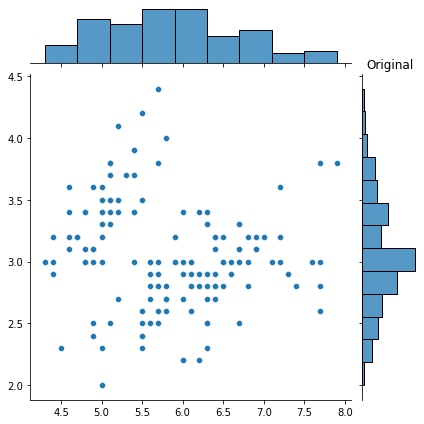

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


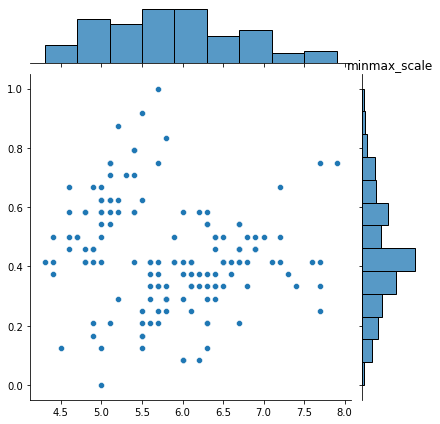

In [25]:
# original 
sns.jointplot(data1[:,0], data1[:, 1])
plt.title('Original')
plt.show()
# minmax_scale
sns.jointplot(data1[:,0], data4[:,1])
plt.title('minmax_scale')
plt.show()

___

### 정규화(Normalization, Scaling and Centering)

목적 : 개별 데이터의 크기를 모두 같게 만들기 위한 변환

##### 제공되는 함수와 클래스 🧮
- normalize(x) 

 

In [35]:
from sklearn.preprocessing import scale, normalize 
y1 = scale(x)
y2 = normalize(x)

In [37]:
print('original x:\n', x)
print('scale:\n', y1)
print('norms:\n', np.linalg.norm(y1, axis=1))
# 크기를 동일하게 만든다 (normalize)
print('normalize:\n', y2)
print('norms (normalize)\n', np.linalg.norm(y2, axis=1))

original x:
 [[-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]]
scale:
 [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
norms:
 [1.5666989  1.21854359 0.87038828 0.52223297 0.17407766 0.17407766
 0.52223297 0.87038828 1.21854359 1.5666989 ]
normalize:
 [[-1.]
 [-1.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
norms (normalize)
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


* 정규화에서는 데이터의 모양에 변화가 생긴다 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


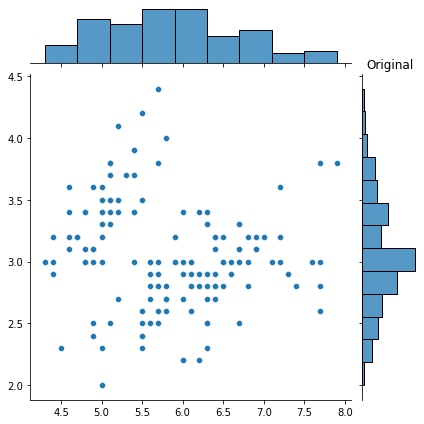

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


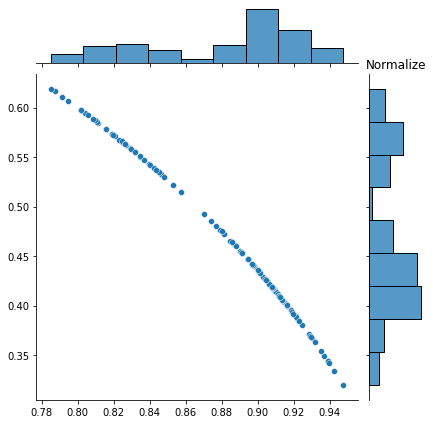

In [38]:
data1 = iris.data[:, :2]
data3 = normalize(data1)
# original 
sns.jointplot(data1[:,0], data1[:, 1])
plt.title('Original')
plt.show()
# normalize
sns.jointplot(data3[:,0], data3[:, 1])
plt.title('Normalize')
plt.show()